In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
sections = [
    "자율활동",
    "동아리활동",
    "진로활동",
    "독서활동상황",
    "행동특성 및 종합의견"
]

In [3]:
# 글자수세기
def count_chars(text):
    return len(text.replace(" ", "").replace("\n", ""))

def extract_sections_from_text(text, sections):
    data = {}
    for section in sections:
        # [자율활동] ... 다음 [항목] 전까지
        pattern = rf"\[{section}\](.*?)(?=\n\[|$)"
        match = re.search(pattern, text, re.DOTALL)

        if match:
            content = match.group(1).strip()
            data[section] = count_chars(content)
        else:
            data[section] = 0

    return data

In [4]:
folder_path = r"../stat_analysis/text_data"

data = []

for file in os.listdir(folder_path):
    if file.endswith(".txt"):
        year = file.split("_")[0]   # 2020_1.txt → 2020
        path = os.path.join(folder_path, file)

        with open(path, "r", encoding="utf-8") as f:
            text = f.read()

        row = {"Year": int(year)}
        row.update(extract_sections_from_text(text, sections))

        data.append(row)

df = pd.DataFrame(data).sort_values("Year").reset_index(drop=True)
df

,Year,자율활동,동아리활동,진로활동,독서활동상황,행동특성 및 종합의견
0,2019,2992,1095,1759,1479,1538
1,2022,1588,1155,2031,945,1169
2,2022,875,650,1999,0,1059
3,2023,1176,1055,1295,178,727
4,2023,1480,1272,2033,949,1265
5,2025,1332,878,1750,0,1108
6,2025,978,1212,1319,0,1180
7,2025,1414,1380,1419,31,1301
8,2025,1459,1122,1789,79,1151
9,2025,1405,1340,1800,0,1324


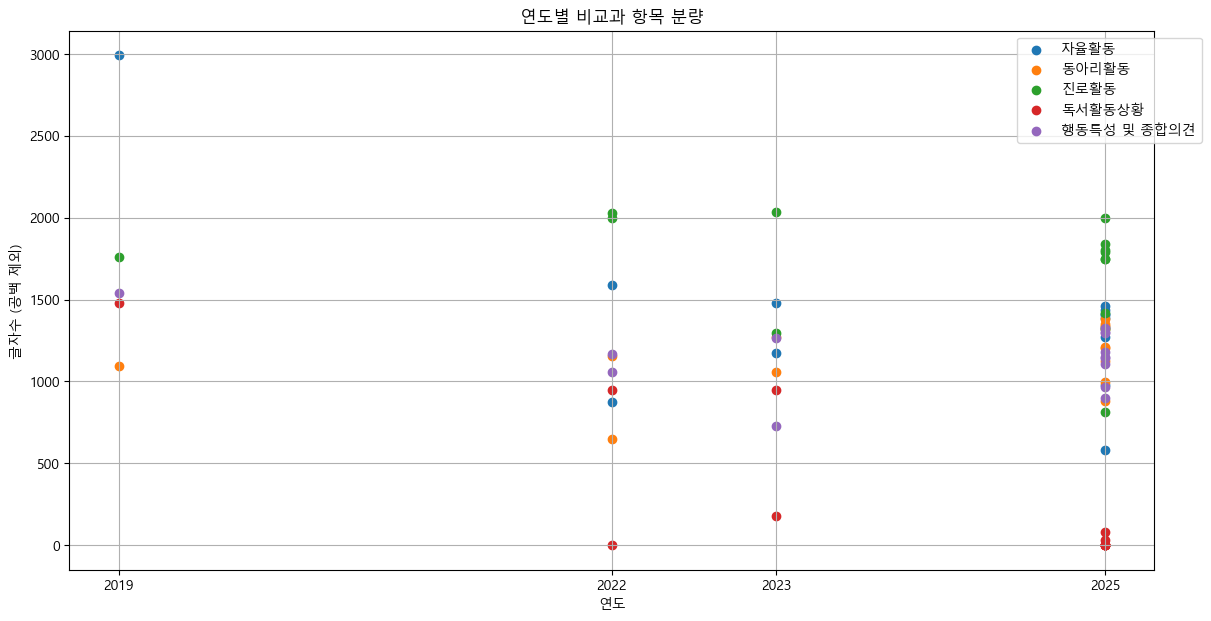

In [5]:
plt.figure(figsize=(14, 7))

for section in sections:
    plt.scatter(df["Year"], df[section], label=section)

plt.xlabel("연도")
plt.ylabel("글자수 (공백 제외)")
plt.title("연도별 비교과 항목 분량")
plt.xticks(sorted(df["Year"].unique()))
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

   Year         자율활동        동아리활동    진로활동       독서활동상황  행동특성 및 종합의견
0  2019  2992.000000  1095.000000  1759.0  1479.000000  1538.000000
1  2022  1231.500000   902.500000  2015.0   472.500000  1114.000000
2  2023  1328.000000  1163.500000  1664.0   563.500000   996.000000
3  2025  1250.888889  1200.111111  1609.0    12.222222  1152.555556


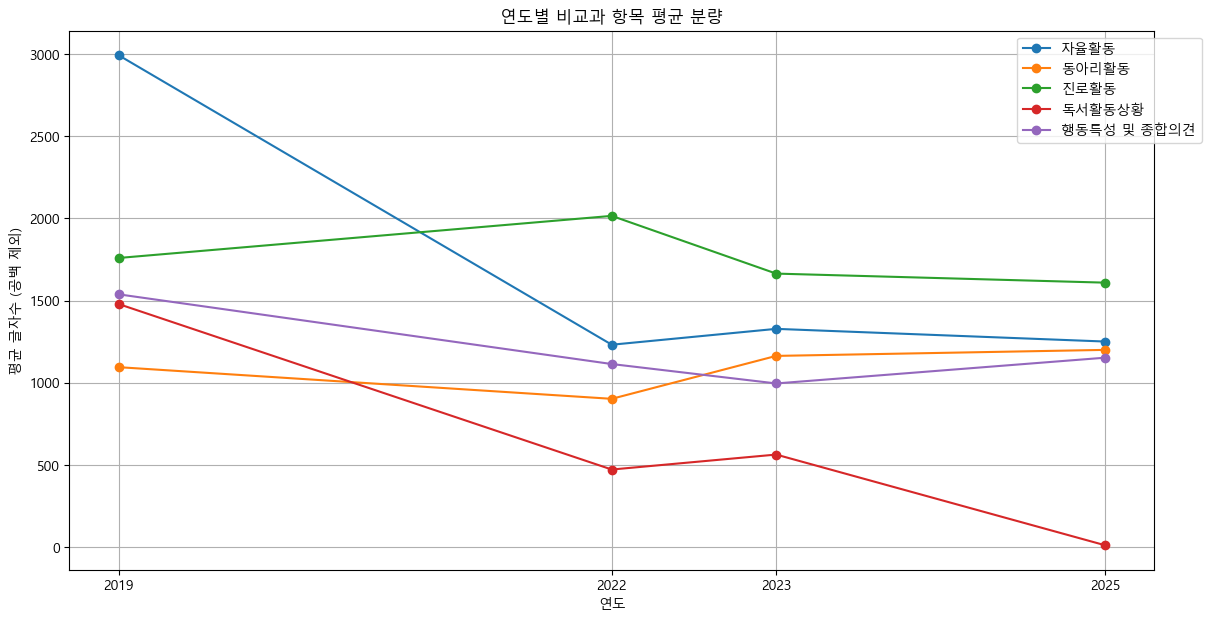

In [6]:
# 연도별 평균 계산
df_mean = df.groupby("Year")[sections].mean().reset_index()

print(df_mean)

# 선그래프
plt.figure(figsize=(14, 7))

for section in sections:
    plt.plot(df_mean["Year"], df_mean[section], marker='o', label=section)

plt.xlabel("연도")
plt.ylabel("평균 글자수 (공백 제외)")
plt.title("연도별 비교과 항목 평균 분량")
plt.xticks(df_mean["Year"]) # 존재하는 연도만 표시
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

In [7]:
df["페이지 수"] = [22, 22, 19, 21, 24, 19, 21, 23, 24, 21, 19, 20, 21, 21]
df

,Year,자율활동,동아리활동,진로활동,독서활동상황,행동특성 및 종합의견,페이지 수
0,2019,2992,1095,1759,1479,1538,22
1,2022,1588,1155,2031,945,1169,22
2,2022,875,650,1999,0,1059,19
3,2023,1176,1055,1295,178,727,21
4,2023,1480,1272,2033,949,1265,24
5,2025,1332,878,1750,0,1108,19
6,2025,978,1212,1319,0,1180,21
7,2025,1414,1380,1419,31,1301,23
8,2025,1459,1122,1789,79,1151,24
9,2025,1405,1340,1800,0,1324,21


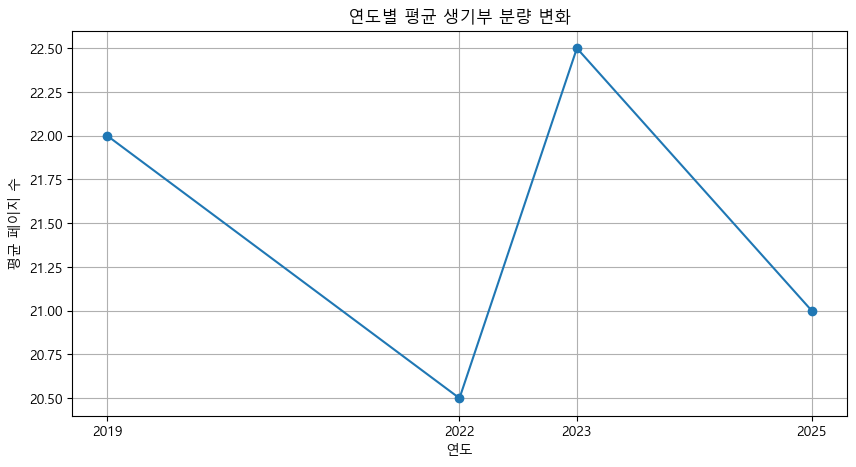

In [8]:
year_avg = (
    df
    .groupby("Year", as_index=False)["페이지 수"]
    .mean()
    .sort_values("Year")
)

plt.figure(figsize=(10, 5))

plt.plot(
    year_avg["Year"],
    year_avg["페이지 수"],
    marker='o'
)

plt.xticks(year_avg["Year"])
plt.xlabel("연도")
plt.ylabel("평균 페이지 수")
plt.title("연도별 평균 생기부 분량 변화")
plt.grid(True)

plt.show()

In [9]:
careers = {
    # 자연·공학
    "컴퓨터공학": {
        "category": "공학",
        "required_subjects": ["수학", "과학"],
        "min_grade": 3,
        "activities": [
            "파이썬으로 데이터 분석 미니 프로젝트",
            "알고리즘 문제 해결 활동",
            "정보기술의 사회적 영향 탐구 보고서 작성"
        ]
    },

    "기계공학": {
        "category": "공학",
        "required_subjects": ["수학", "과학"],
        "min_grade": 3,
        "activities": [
            "간단한 기계 구조 설계 활동",
            "물리 법칙을 적용한 장치 제작",
            "기계 기술 발전 사례 조사"
        ]
    },

    "화학공학": {
        "category": "공학",
        "required_subjects": ["수학", "과학"],
        "min_grade": 3,
        "activities": [
            "화학 반응을 활용한 실생활 문제 탐구",
            "친환경 소재 관련 탐구 보고서",
            "화학 산업 동향 조사"
        ]
    },

    # 융합공학
    "환경공학": {
        "category": "공학",
        "required_subjects": ["과학"],
        "min_grade": 3,
        "activities": [
            "환경 문제 해결 아이디어 제안",
            "탄소 중립 관련 탐구",
            "지역 환경 조사 보고서"
        ]
    },

    "데이터사이언스": {
        "category": "공학",
        "required_subjects": ["수학"],
        "min_grade": 3,
        "activities": [
            "공공 데이터 분석 프로젝트",
            "통계 기반 문제 해결",
            "데이터 시각화 활동"
        ]
    },

    # 인문·사회
    "경영학": {
        "category": "인문",
        "required_subjects": ["국어", "사회"],
        "min_grade": 3,
        "activities": [
            "모의 창업 프로젝트 수행",
            "기업 사례 분석 보고서 작성",
            "경제 기사 스크랩 및 토론"
        ]
    },

    "법학": {
        "category": "인문",
        "required_subjects": ["국어", "사회"],
        "min_grade": 3,
        "activities": [
            "모의 재판 활동",
            "판례 분석 보고서 작성",
            "사회 규범과 법의 역할 토론"
        ]
    },

    # 예체능
    "디자인": {
        "category": "예체능",
        "required_subjects": ["국어"],
        "min_grade": 4,
        "activities": [
            "시각 디자인 작품 제작",
            "디자인 트렌드 분석",
            "포스터 제작 프로젝트"
        ]
    },

    "체육학": {
        "category": "예체능",
        "required_subjects": ["체육"],
        "min_grade": 4,
        "activities": [
            "운동 수행 능력 분석",
            "스포츠 과학 탐구",
            "체육 프로그램 기획"
        ]
    }
}

In [10]:
def recommend_careers(student, careers):
    recommended = []

    for career, info in careers.items():
        # 분야(category) 조건
        if student["interest"] != info["category"]:
            continue

        subject_grades = [
            student["grades"][sub]
            for sub in info["required_subjects"]
            if sub in student["grades"]
        ]

        if not subject_grades:
            continue

        avg_grade = round(sum(subject_grades) / len(subject_grades))

        if avg_grade <= info["min_grade"]:
            recommended.append(career)

    return recommended

In [11]:
print("과목별 등급을 입력하세요")

grades = {}
for subject in ["국어", "수학", "영어", "과학", "사회", "체육"]:
    grade = int(input(f"{subject} 등급: "))
    grades[subject] = grade

interest = input("\n관심 분야(공학, 인문, 예체능): ").strip()

student = {
    "grades": grades,
    "interest": interest
}

recommended = recommend_careers(student, careers)

if not recommended:
    print("\n⚠️ 현재 조건에 맞는 추천 진로가 없습니다.")
else:
    print("\n✅ 추천 진로:")
    for career in recommended:
        print(f"\n▶ {career}")
        print("추천 활동:")
        for act in careers[career]["activities"]:
            print(" -", act)

과목별 등급을 입력하세요


국어 등급:  3
수학 등급:  2
영어 등급:  3
과학 등급:  4
사회 등급:  4
체육 등급:  1

관심 분야(공학, 인문, 예체능):  공학



✅ 추천 진로:

▶ 컴퓨터공학
추천 활동:
 - 파이썬으로 데이터 분석 미니 프로젝트
 - 알고리즘 문제 해결 활동
 - 정보기술의 사회적 영향 탐구 보고서 작성

▶ 기계공학
추천 활동:
 - 간단한 기계 구조 설계 활동
 - 물리 법칙을 적용한 장치 제작
 - 기계 기술 발전 사례 조사

▶ 화학공학
추천 활동:
 - 화학 반응을 활용한 실생활 문제 탐구
 - 친환경 소재 관련 탐구 보고서
 - 화학 산업 동향 조사

▶ 데이터사이언스
추천 활동:
 - 공공 데이터 분석 프로젝트
 - 통계 기반 문제 해결
 - 데이터 시각화 활동
